In [4]:
import pandas as pd

import os

import matplotlib.pyplot as plt

### combining all the csv files into one file 

In [9]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

months_data = pd.DataFrame()

files = [file for file in os.listdir('Sales_Data')]

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    
    months_data = pd.concat([months_data,df])
    
months_data.to_csv('all_data.csv',index = False)



In [5]:
complete_data = pd.read_csv('all_data.csv')

#### Add month column

### remove NaN and clean data

In [6]:
nan_df = complete_data[complete_data.isna().any(axis = 1)]

nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
complete_data = complete_data.dropna(how = 'all')

In [8]:
complete_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### delete OR's

In [9]:
complete_data = complete_data[complete_data['Order Date'].str[0:2] != 'Or']

complete_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [10]:
complete_data['Quantity Ordered'] = pd.to_numeric(complete_data['Quantity Ordered'])

complete_data['Price Each'] = pd.to_numeric(complete_data['Price Each'])

In [11]:
complete_data['Month'] = complete_data['Order Date'].str[0:2]

complete_data['Month'] = complete_data['Month'].astype('int32')

complete_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [40]:
complete_data['Sales'] = complete_data['Quantity Ordered'].astype('int') * complete_data['Price Each'].astype('float')
complete_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


#### Question 1: What was the best month for sales? How much was earned that month? 

In [44]:
complete_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales,Hour,Minute,Count
Month,,,,,,
1,10903,1811768.38,1822256.73,139485,282440,9709
2,13449,2188884.72,2202022.42,172669,354885,11975
3,17005,2791207.83,2807100.38,218969,447559,15153
4,20558,3367671.02,3390670.24,262259,544186,18279
5,18667,3135125.13,3152606.75,238780,487899,16566
6,15253,2562025.61,2577802.26,195528,402436,13554
7,16072,2632539.56,2647775.76,206169,417349,14293
8,13448,2230345.42,2244467.88,172289,353857,11961
9,13109,2084992.09,2097560.13,168513,341698,11621


In [13]:
months = range(1,13)

print(months)

range(1, 13)


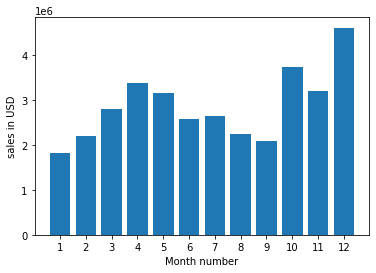

In [43]:

plt.bar(months,complete_data.groupby(['Month']).sum()['Sales'])

plt.xticks(months)

plt.ylabel('sales in USD')

plt.xlabel('Month number')

plt.show()

# 12th month(December) was the best month for sales



In [17]:
complete_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### add city column

In [18]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]




complete_data['City'] = complete_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

complete_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Question 2: What city had highest number of sales

In [19]:
 complete_data.groupby(['City']).sum()['Sales']

City
 Atlanta (GA)          2795498.58
 Austin (TX)           1819581.75
 Boston (MA)           3661642.01
 Dallas (TX)           2767975.40
 Los Angeles (CA)      5452570.80
 New York City (NY)    4664317.43
 Portland (ME)          449758.27
 Portland (OR)         1870732.34
 San Francisco (CA)    8262203.91
 Seattle (WA)          2747755.48
Name: Sales, dtype: float64

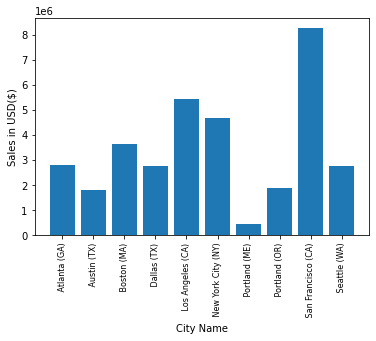

In [20]:
cities = [city for city, df in complete_data.groupby(['City'])]

plt.bar(cities,complete_data.groupby(['City']).sum()['Sales'])

plt.xticks(cities, rotation = 'vertical',size = 8)

plt.xlabel('City Name')

plt.ylabel('Sales in USD($)')

plt.show()

# San Francisco had highest number of sales

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [21]:
complete_data['Order Date'] = pd.to_datetime(complete_data['Order Date'])

complete_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [34]:
complete_data['Hour'] = complete_data['Order Date'].dt.hour

complete_data['Minute'] = complete_data['Order Date'].dt.minute

complete_data['Count'] = 1

complete_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


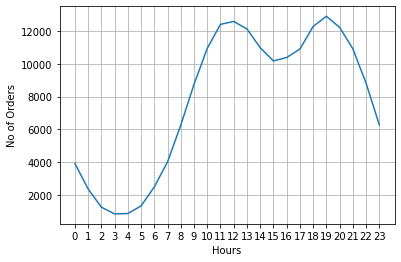

In [35]:
keys = [pair for pair, df in complete_data.groupby(['Hour'])]


plt.plot(keys, complete_data.groupby(['Hour']).count()['Count'])

plt.xticks(keys)

plt.xlabel('Hours')

plt.ylabel('No of Orders')

plt.grid()

plt.show()

# advertisements should be displayed at 11 am or 7pm

#### Question 4: What products are most often sold together?

In [29]:
df = complete_data[complete_data['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

C:\Users\jerry\AppData\Local\Temp\ipykernel_18608\1015263253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [31]:
from itertools import combinations

from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)
    
    

# iphone and lightining charging cable are most often sold together


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? Why do you think it sold the most?

In [203]:
complete_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


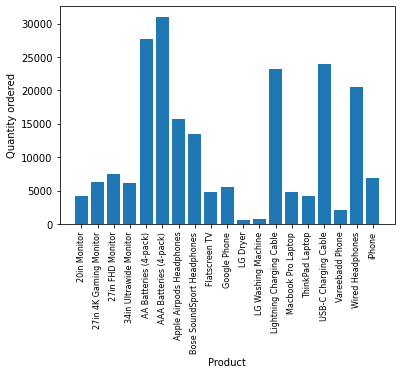

In [215]:
product_group = complete_data.groupby('Product')

Quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products,Quantity_ordered)

plt.xlabel('Product')

plt.ylabel('Quantity ordered')

plt.xticks(products,rotation ='vertical',size = 8)

plt.show()

# AA batteries are sold the most


C:\Users\jerry\AppData\Local\Temp\ipykernel_16192\1228078347.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation = 'vertical',size = '8')


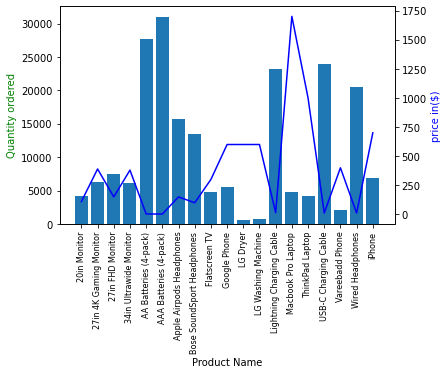

In [230]:
prices = complete_data.groupby('Product').mean()['Price Each']

fig , ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, Quantity_ordered)

ax2.plot(products, prices, 'b-')


ax1.set_xlabel('Product Name')

ax1.set_ylabel('Quantity ordered', color = 'g')

ax2.set_ylabel('price in($)',color ='b')

ax1.set_xticklabels(products,rotation = 'vertical',size = '8')

plt.show()

# price is one of the reasons for the highest sales of AA batteries

